In [1]:
# Cell 1: Load the dataset
import pandas as pd

diabetes_risk_data = pd.read_csv("diabetes_data_upload.csv")
diabetes_risk_data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [2]:
diabetes_risk_data.shape

(520, 17)

In [3]:
# Cell 2: Clean whitespace
diabetes_risk_data = diabetes_risk_data.apply(lambda x: x.str.strip() if x.dtype == 'object' else x)
diabetes_risk_data.head()


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [4]:
# Cell 3: Rename columns to snake_case
diabetes_risk_data.columns = diabetes_risk_data.columns.str.strip().str.lower().str.replace(' ', '_')
diabetes_risk_data.columns.tolist()


['age',
 'gender',
 'polyuria',
 'polydipsia',
 'sudden_weight_loss',
 'weakness',
 'polyphagia',
 'genital_thrush',
 'visual_blurring',
 'itching',
 'irritability',
 'delayed_healing',
 'partial_paresis',
 'muscle_stiffness',
 'alopecia',
 'obesity',
 'class']

In [5]:
# Cell 4: Drop duplicates
diabetes_risk_data.drop_duplicates(inplace=True)
diabetes_risk_data.shape


(251, 17)

In [6]:
# Cell 5: Check for null values
diabetes_risk_data.isnull().sum()


,0
age,0
gender,0
polyuria,0
polydipsia,0
sudden_weight_loss,0
weakness,0
polyphagia,0
genital_thrush,0
visual_blurring,0
itching,0


In [7]:
# Cell 6: Encode binary features and target column
binary_map = {'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0}
encoded_diabetes_data = diabetes_risk_data.replace(binary_map)

# Encode the target column separately and rename it
encoded_diabetes_data['diabetes_class'] = encoded_diabetes_data['class'].map({'Positive': 1, 'Negative': 0})
encoded_diabetes_data.drop(columns=['class'], inplace=True)

encoded_diabetes_data.head()


/tmp/ipython-input-2797916423.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  encoded_diabetes_data = diabetes_risk_data.replace(binary_map)


,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,diabetes_class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


# Exploratory Data Analysis

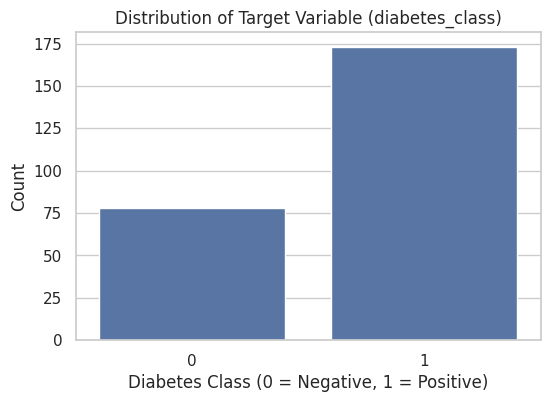

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Cell 7: Plot class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='diabetes_class', data=encoded_diabetes_data)
plt.title("Distribution of Target Variable (diabetes_class)")
plt.xlabel("Diabetes Class (0 = Negative, 1 = Positive)")
plt.ylabel("Count")
plt.show()


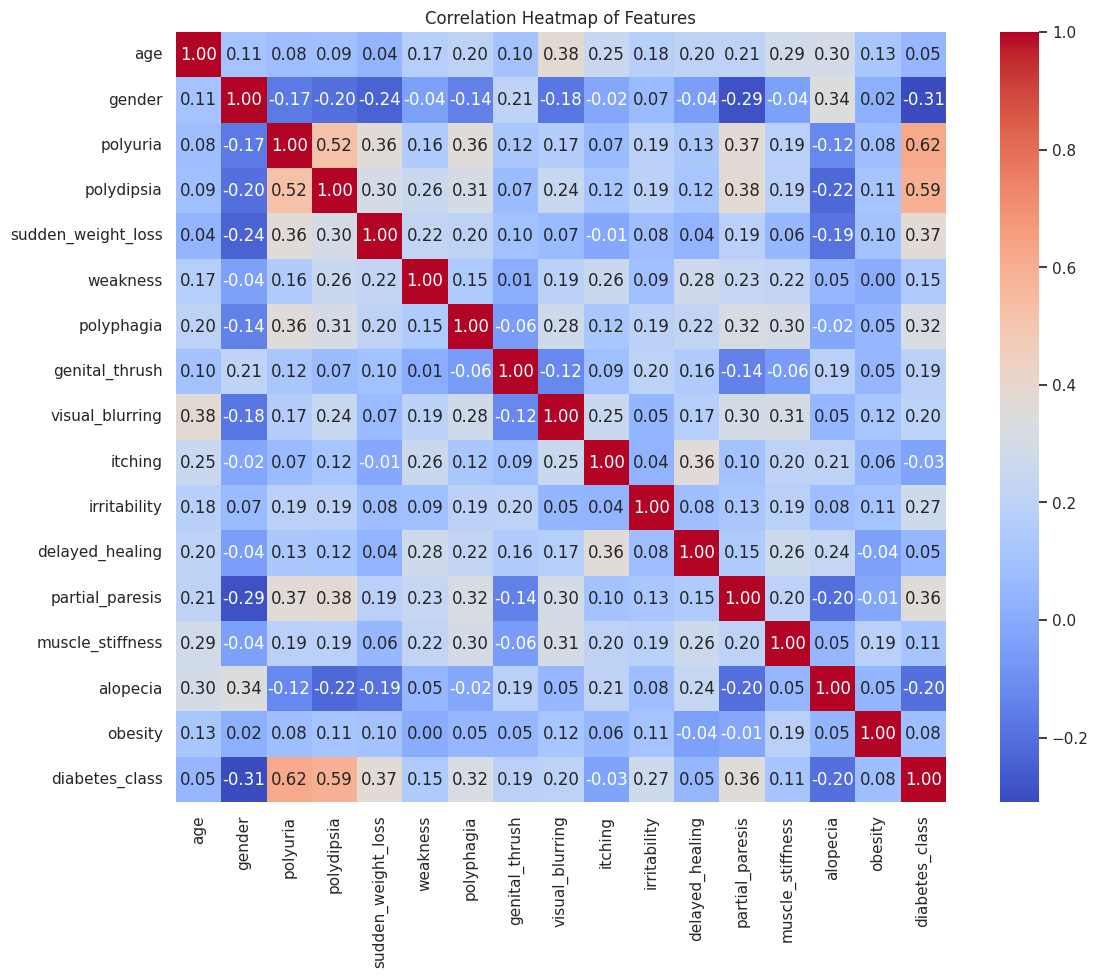

In [9]:
# Cell 8: Correlation heatmap including the target
plt.figure(figsize=(14, 10))
corr = encoded_diabetes_data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Heatmap of Features")
plt.show()


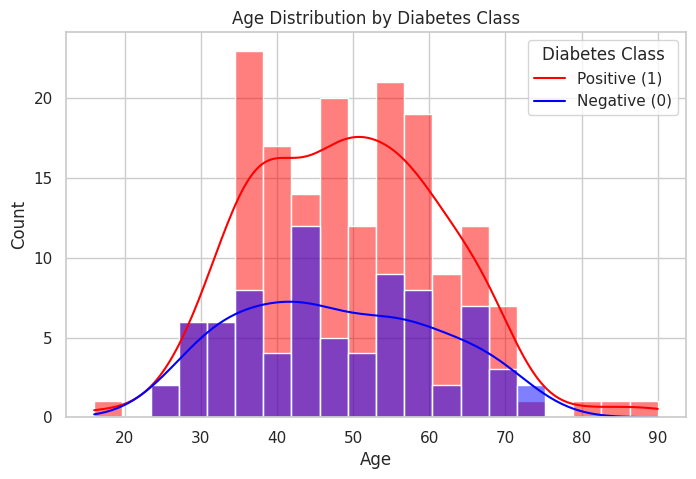

In [10]:
# Cell 9: Age distribution by diabetes class
plt.figure(figsize=(8, 5))

# Explicit mapping: 0 = Negative (blue), 1 = Positive (red)
sns.histplot(
    data=encoded_diabetes_data,
    x='age',
    hue='diabetes_class',
    bins=20,
    kde=True,
    palette={0:"blue" , 1: "red"}
)

plt.title("Age Distribution by Diabetes Class")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend(title='Diabetes Class', labels=['Positive (1)' ,'Negative (0)'])
plt.show()


/tmp/ipython-input-437244628.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['No', 'Yes'])  # show friendly labels instead of 0/1
/tmp/ipython-input-437244628.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['No', 'Yes'])  # show friendly labels instead of 0/1
/tmp/ipython-input-437244628.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['No', 'Yes'])  # show friendly labels instead of 0/1
/tmp/ipython-input-437244628.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['No', 'Yes'])  # show friendly labels instead of 0/1
/tmp/ipython-input-437244628.py:32: UserWarn

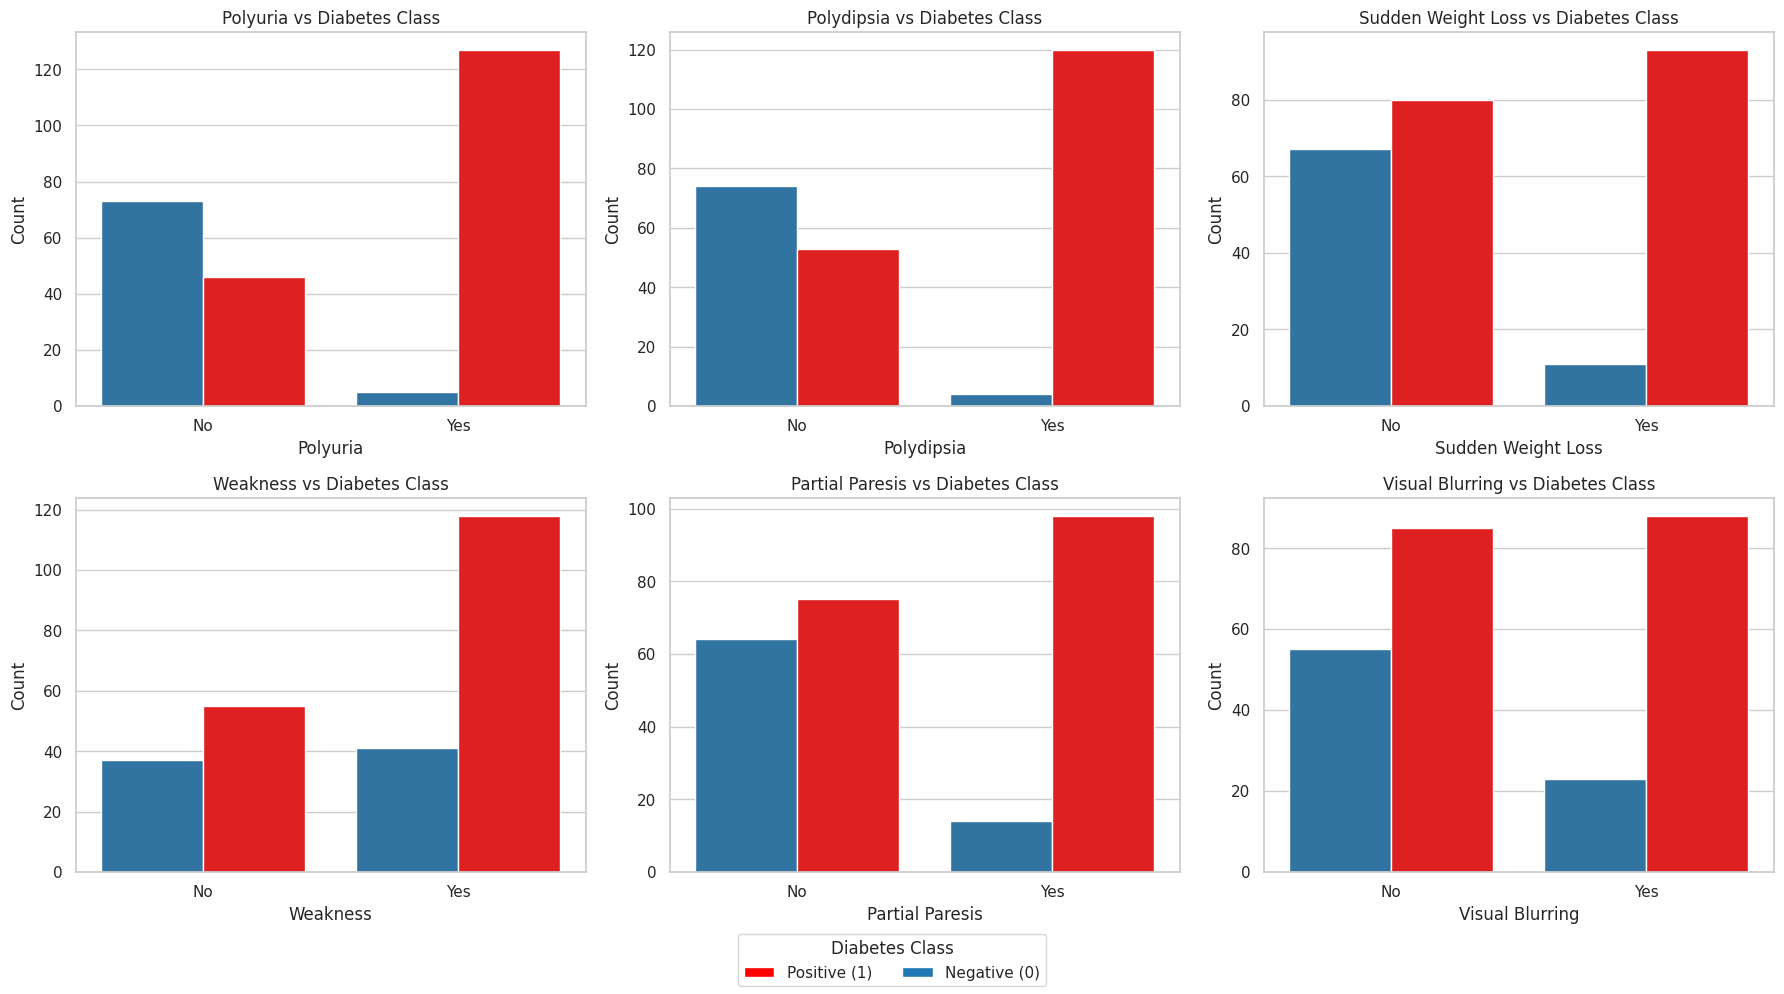

In [11]:
# Cell 10: Plot top 6 symptom features vs. diabetes_class
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch

symptom_cols = [
    'polyuria', 'polydipsia', 'sudden_weight_loss',
    'weakness', 'partial_paresis', 'visual_blurring'
]

# Force colors by class: 0 -> blue, 1 -> red
palette_map = {0: "tab:blue", 1: "red"}   # Positive is red
hue_order = [0, 1]

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for ax, col in zip(axes, symptom_cols):
    sns.countplot(
        data=encoded_diabetes_data,
        x=col,                       # these columns are 0/1 in your encoded data
        order=[0, 1],                # keep x-axis consistent
        hue='diabetes_class',
        hue_order=hue_order,
        palette=palette_map,
        dodge=True,
        ax=ax
    )
    ax.set_title(f"{col.replace('_', ' ').title()} vs Diabetes Class")
    ax.set_xlabel(col.replace('_', ' ').title())
    ax.set_ylabel("Count")
    ax.set_xticklabels(['No', 'Yes'])  # show friendly labels instead of 0/1

    # remove per-axes legends to avoid mismatch
    leg = ax.get_legend()
    if leg is not None:
        leg.remove()

# One clean, global legend (Positive (1) is red)
handles = [
    Patch(facecolor=palette_map[1], label='Positive (1)'),
    Patch(facecolor=palette_map[0], label='Negative (0)'),
]
fig.legend(handles=handles, loc='lower center', ncol=2, title="Diabetes Class")

plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.show()


In [12]:
# Cell 11: Outlier removal using IQR for all numeric columns

# Create a copy to preserve the filtered dataset
iqr_filtered_data = encoded_diabetes_data.copy()

# Identify numeric columns
numeric_cols = iqr_filtered_data.select_dtypes(include='number').columns.tolist()

# Remove outliers from each numeric column
for col in numeric_cols:
    Q1 = iqr_filtered_data[col].quantile(0.25)
    Q3 = iqr_filtered_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    iqr_filtered_data = iqr_filtered_data[
        (iqr_filtered_data[col] >= lower_bound) & (iqr_filtered_data[col] <= upper_bound)
    ]

# Report shape before and after
before_shape = encoded_diabetes_data.shape
after_shape = iqr_filtered_data.shape

before_shape, after_shape


((251, 17), (206, 17))

In [14]:
# Split FIRST
from sklearn.model_selection import train_test_split
X = encoded_diabetes_data.drop(columns='diabetes_class')
y = encoded_diabetes_data['diabetes_class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# SMOTE on TRAIN ONLY
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Fit scalers on TRAIN ONLY (for ANN)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train_res)
X_train_scaled = scaler.transform(X_train_res)
X_test_scaled  = scaler.transform(X_test)


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix


# Step 1: Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Define the ANN model
neural_watchdog = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Step 3: Compile and train
neural_watchdog.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
neural_watchdog.fit(X_train_scaled, y_train, epochs=10, batch_size=16)

# Step 4: Predict and evaluate
y_pred_ann = (neural_watchdog.predict(X_test_scaled) > 0.5).astype("int32").flatten()
print(classification_report(y_test, y_pred_ann))
print(confusion_matrix(y_test, y_pred_ann))


Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6616 - loss: 0.6484
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7315 - loss: 0.5139  
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8090 - loss: 0.4399 
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8550 - loss: 0.3871 
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9293 - loss: 0.3053 
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9346 - loss: 0.2599 
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9390 - loss: 0.2545 
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9629 - loss: 0.2042 
Epoch 9/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9450 - loss: 0.1712 
Epoch 10/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9476 - loss: 0.1657 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
              precision    recall  f1-score   support

           0       0.71      0.94      0.81        16
           1 

In [16]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Train Random Forest on SMOTE-balanced and split data
forest_guardian = RandomForestClassifier(
    n_estimators=150,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)
forest_guardian.fit(X_train, y_train)

# Predict and evaluate
rf_preds = forest_guardian.predict(X_test)
rf_report = classification_report(y_test, rf_preds)
rf_conf_matrix = confusion_matrix(y_test, rf_preds)

print(rf_report, rf_conf_matrix)


              precision    recall  f1-score   support

           0       0.79      0.94      0.86        16
           1       0.97      0.89      0.93        35

    accuracy                           0.90        51
   macro avg       0.88      0.91      0.89        51
weighted avg       0.91      0.90      0.90        51
 [[15  1]
 [ 4 31]]


In [17]:

from xgboost import XGBClassifier

# Train XGBoost model on SMOTE-balanced and split data
xgboost_sentinel = XGBClassifier(
    learning_rate=0.1,
    max_depth=4,
    n_estimators=100,
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
xgboost_sentinel.fit(X_train, y_train)

# Predict and evaluate
xgb_preds = xgboost_sentinel.predict(X_test)
xgb_report = classification_report(y_test, xgb_preds)
xgb_conf_matrix = confusion_matrix(y_test, xgb_preds)

xgb_report, xgb_conf_matrix


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [15:13:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


('              precision    recall  f1-score   support\n\n           0       0.73      1.00      0.84        16\n           1       1.00      0.83      0.91        35\n\n    accuracy                           0.88        51\n   macro avg       0.86      0.91      0.87        51\nweighted avg       0.91      0.88      0.89        51\n',
 array([[16,  0],
        [ 6, 29]]))

In [18]:
from sklearn.metrics import classification_report, confusion_matrix

# ----- Random Forest -----
rf_preds = forest_guardian.predict(X_test)
print(" Random Forest - forest_guardian")
print(classification_report(y_test, rf_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_preds))
print("-" * 60)

# ----- XGBoost -----
xgb_preds = xgboost_sentinel.predict(X_test)
print(" XGBoost - xgboost_sentinel")
print(classification_report(y_test, xgb_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, xgb_preds))
print("-" * 60)

# ----- ANN (must be trained with scaled inputs) -----
# Make sure X_train_scaled and X_test_scaled were created with StandardScaler
ann_preds = (neural_watchdog.predict(X_test_scaled) > 0.5).astype("int32").flatten()

print(" Artificial Neural Network - neural_watchdog")
print(classification_report(y_test, ann_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, ann_preds))


 Random Forest - forest_guardian
              precision    recall  f1-score   support

           0       0.79      0.94      0.86        16
           1       0.97      0.89      0.93        35

    accuracy                           0.90        51
   macro avg       0.88      0.91      0.89        51
weighted avg       0.91      0.90      0.90        51

Confusion Matrix:
 [[15  1]
 [ 4 31]]
------------------------------------------------------------
 XGBoost - xgboost_sentinel
              precision    recall  f1-score   support

           0       0.73      1.00      0.84        16
           1       1.00      0.83      0.91        35

    accuracy                           0.88        51
   macro avg       0.86      0.91      0.87        51
weighted avg       0.91      0.88      0.89        51

Confusion Matrix:
 [[16  0]
 [ 6 29]]
------------------------------------------------------------
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
 Artificial Neural Network - neural_watchdog
    

In [19]:
# Hyperparameter tuning for Random Forest using RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV

# Define parameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Instantiate the model
rf_model = RandomForestClassifier(random_state=42)

# RandomizedSearchCV setup
rf_random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=rf_param_grid,
    n_iter=20,
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1,
    scoring='accuracy'
)

# Fit the search to the SMOTE-balanced training data
rf_random_search.fit(X_train, y_train)

# Best parameters and best score
best_rf_params = rf_random_search.best_params_
best_rf_score = rf_random_search.best_score_

best_rf_params, best_rf_score


Fitting 5 folds for each of 20 candidates, totalling 100 fits


({'n_estimators': 50,
  'min_samples_split': 2,
  'min_samples_leaf': 1,
  'max_depth': 10,
  'bootstrap': False},
 np.float64(0.9400000000000001))

In [20]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

param_grid_xgb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

xgb_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid_xgb,
    n_iter=20,
    scoring='accuracy',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

xgb_search.fit(X_train, y_train)

print("Best Params:", xgb_search.best_params_)
print("Best Score:", xgb_search.best_score_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [15:17:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Params: {'subsample': 0.8, 'n_estimators': 150, 'max_depth': 4, 'learning_rate': 0.2, 'colsample_bytree': 0.8}
Best Score: 0.93


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Random Forest AUC: 0.9589
XGBoost AUC:       0.9536
ANN AUC:           0.9429


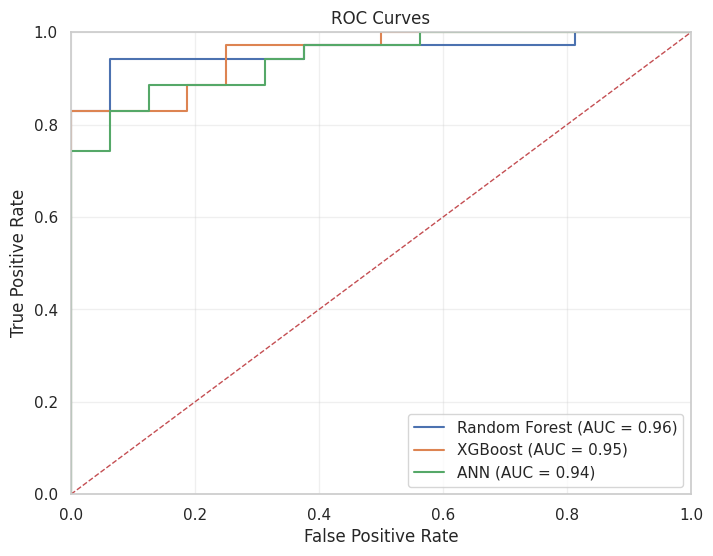

In [21]:
# === AUC/ROC + Confusion Matrices (counts only) ===
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix

# --- Probabilities for ROC/AUC ---
rf_probs  = forest_guardian.predict_proba(X_test)[:, 1]
xgb_probs = xgboost_sentinel.predict_proba(X_test)[:, 1]
ann_probs = neural_watchdog.predict(X_test_scaled).ravel()

# --- AUC + ROC points ---
rf_auc  = roc_auc_score(y_test, rf_probs)
xgb_auc = roc_auc_score(y_test, xgb_probs)
ann_auc = roc_auc_score(y_test, ann_probs)

rf_fpr,  rf_tpr,  _ = roc_curve(y_test, rf_probs)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probs)
ann_fpr, ann_tpr, _ = roc_curve(y_test, ann_probs)

print(f"Random Forest AUC: {rf_auc:.4f}")
print(f"XGBoost AUC:       {xgb_auc:.4f}")
print(f"ANN AUC:           {ann_auc:.4f}")

# --- Plot ROC curves (all models) ---
plt.figure(figsize=(8, 6))
plt.plot(rf_fpr,  rf_tpr,  label=f"Random Forest (AUC = {rf_auc:.2f})")
plt.plot(xgb_fpr, xgb_tpr, label=f"XGBoost (AUC = {xgb_auc:.2f})")
plt.plot(ann_fpr, ann_tpr, label=f"ANN (AUC = {ann_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", linewidth=1)
plt.xlim([0, 1]); plt.ylim([0, 1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()




Random Forest Confusion Matrix (counts):
 [[15  1]
 [ 4 31]]

XGBoost Confusion Matrix (counts):
 [[16  0]
 [ 6 29]]

ANN Confusion Matrix (counts):
 [[15  1]
 [ 6 29]]


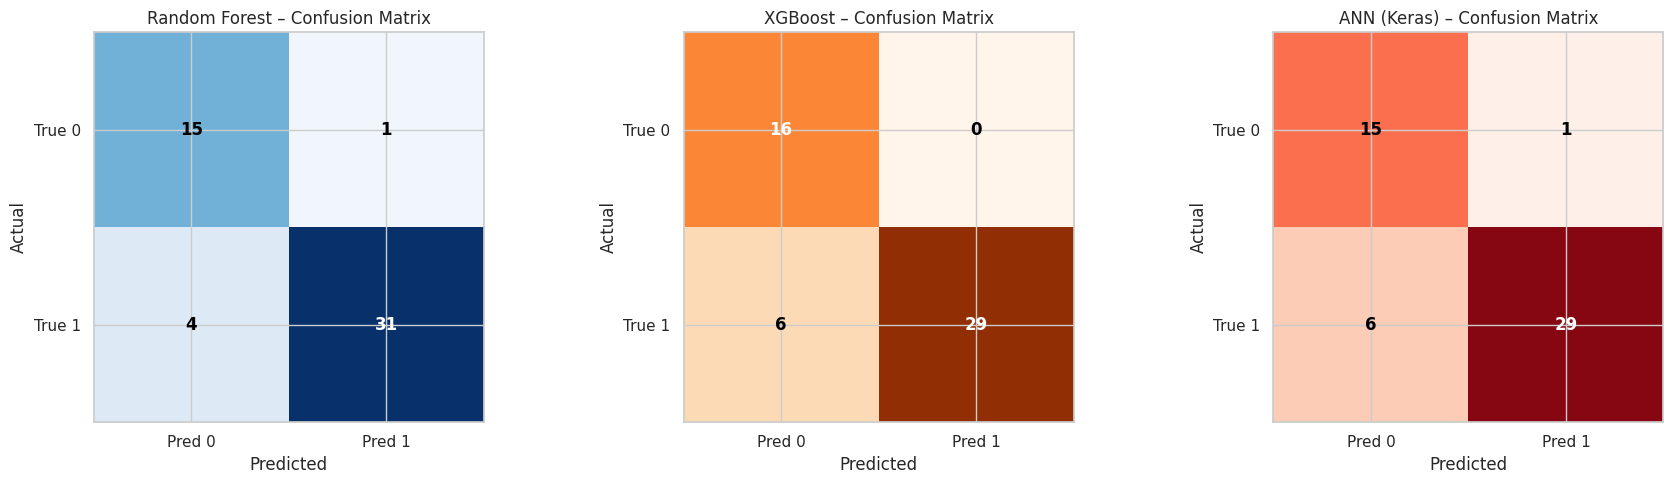

In [22]:
# --- Confusion matrices (counts only) using 0.5 threshold for consistency ---
rf_preds  = (rf_probs  >= 0.5).astype(int)
xgb_preds = (xgb_probs >= 0.5).astype(int)
ann_preds = (ann_probs >= 0.5).astype(int)

rf_cm  = confusion_matrix(y_test, rf_preds,  labels=[0, 1])
xgb_cm = confusion_matrix(y_test, xgb_preds, labels=[0, 1])
ann_cm = confusion_matrix(y_test, ann_preds, labels=[0, 1])

print("\nRandom Forest Confusion Matrix (counts):\n", rf_cm)
print("\nXGBoost Confusion Matrix (counts):\n", xgb_cm)
print("\nANN Confusion Matrix (counts):\n", ann_cm)

# --- Visualize CMs (counts only) with improved colours & readable numbers ---
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
titles = ["Random Forest", "XGBoost", "ANN (Keras)"]
cms = [rf_cm, xgb_cm, ann_cm]
cmaps = ["Blues", "Oranges", "Reds"]  # distinct, high-contrast colormaps

# keep the same scale across subplots for consistent shading
vmax = max(cm.max() for cm in cms)

for ax, cm, title, cmap in zip(axes, cms, titles, cmaps):
    im = ax.imshow(cm, cmap=cmap, vmin=0, vmax=vmax)
    # choose text colour based on cell intensity for readability
    thresh = vmax * 0.5 if vmax > 0 else 0.5
    for (i, j), v in np.ndenumerate(cm):
        ax.text(
            j, i, int(v),
            ha="center", va="center",
            fontsize=12, fontweight="bold",
            color=("white" if v > thresh else "black")
        )
    ax.set_xticks([0, 1]); ax.set_yticks([0, 1])
    ax.set_xticklabels(['Pred 0', 'Pred 1'])
    ax.set_yticklabels(['True 0', 'True 1'])
    ax.set_title(title + " – Confusion Matrix")
    ax.set_xlabel("Predicted"); ax.set_ylabel("Actual")

plt.tight_layout()
plt.show()
